<a href="https://colab.research.google.com/github/KaidNassima/Machine_learning_labs/blob/main/EX3_TP04_Classification_%26_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercice 03 


Question 01 : Loading the data 

In [ ]:
#loading data from collab 
from google.colab import files
uploaded = files.upload()
#loading data 
import pandas as pd
data=pd.read_csv('Data_Set.csv',header=None)


Saving Data_Set.csv to Data_Set.csv


Question 02 : display data in tabular form 

In [ ]:
#display data 
data

,0,1,2,3,4,5,6,7
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157
...,...,...,...,...,...,...,...,...
4995,4995,2007,17,6,3,90,125,13539
4996,4996,2016,7,10,0,85,129,14757
4997,4997,2017,6,10,5,90,125,14102
4998,4998,2010,37,3,5,81,128,14313


Question 03 : data normalization

In [ ]:
#data normalization
min=data.min()
max=data.max()
n_data=(data-min)/(max-min) 
#We must carry out the normalization in order to put the different variables on
#the same scale, so all the variables will have the same amount of information
#and the same importance

Question 04 : store the last column as labels

In [ ]:
#Select the last column as labels
y=n_data[7]

Question 05 : delete the last column "price" and select all the other columns as features.


In [ ]:
X=n_data
X=X.drop(columns=7)

Question 06 : Divide the data into,test and training sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Question 07 : creation of the neural network

In [ ]:
import tensorflow as tf
#Creation of the neural network
model = tf.keras.Sequential()
#number features :7
model.add(tf.keras.layers.Input(shape=(7))) 
#input layer
model.add(tf.keras.layers.Dense(10,activation='relu')) 
#hidden layers
model.add(tf.keras.layers.Dense(20,activation='relu')) 
model.add(tf.keras.layers.Dense(5,activation='relu'))
#output layer 
model.add(tf.keras.layers.Dense(1,activation='relu'))
#optimize et loss
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='mse')

Question 08 : displaying the summary of the model 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                80        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 411
Trainable params: 411
Non-trainable params: 0
_________________________________________________________________


Question 09 : plot the model 

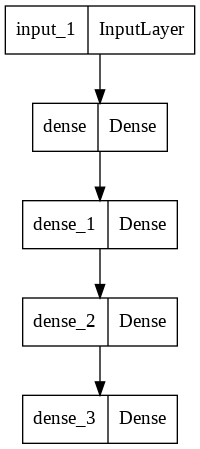

In [ ]:
tf.keras.utils.plot_model(model)

Question 10 :  training with 200 iteration 

In [ ]:
#Training
hist=model.fit(X_train, y_train,validation_data=[X_test,y_test] ,batch_size=32, epochs=200)

Epoch 1/200
125/125 [==============================] - 1s 4ms/step - loss: 0.0427 - val_loss: 0.0290
Epoch 2/200
125/125 [==============================] - 0s 3ms/step - loss: 0.0260 - val_loss: 0.0226
Epoch 3/200
125/125 [==============================] - 0s 2ms/step - loss: 0.0204 - val_loss: 0.0174
Epoch 4/200
125/125 [==============================] - 0s 2ms/step - loss: 0.0160 - val_loss: 0.0136
Epoch 5/200
125/125 [==============================] - 0s 3ms/step - loss: 0.0130 - val_loss: 0.0113
Epoch 6/200
125/125 [==============================] - 0s 3ms/step - loss: 0.0110 - val_loss: 0.0098
Epoch 7/200
125/125 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.0088
Epoch 8/200
125/125 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0082
Epoch 9/200
125/125 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0077
Epoch 10/200
125/125 [==============================] - 0s 2ms/step - loss: 0.0079 - val_lo

Question 11 : plot the training and validation loss

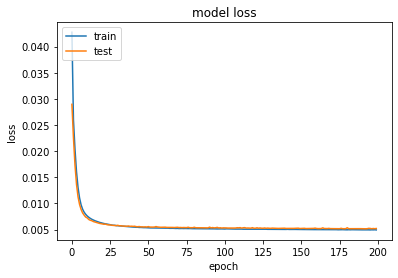

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Question 12 : model performance

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("%s: %.5f" % (model.metrics_names, scores))

32/32 [==============================] - 0s 1ms/step - loss: 0.0052
['loss']: 0.00520


Question 13 : converting the predicted and target values to their original values 

32/32 [==============================] - 0s 1ms/step


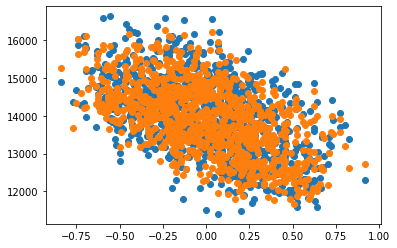

In [ ]:
y_pred=model.predict(X_test)
y_pred=(y_pred*(max[7]-min[7])+min[7])
y_test=(y_test*(max[7]-min[7])+min[7])

#since we cannot plot more than two dimensions, we go through a
#acp to reduce data dimension
from sklearn.decomposition import PCA
pca = PCA(1)
df = pca.fit_transform(X_test)
#plot 
plt.scatter(df,y_test)
plt.scatter(df,y_pred)
plt.show()